In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from sklearn import preprocessing

Benjamin: cumulative_enrollment, stats_sd

Andrew: pubschools_info

Alex: border_crossings

In [6]:
border_crossings_path = os.path.join('Datasets', 'border_crossings.csv')
border_crossings = pd.read_csv(border_crossings_path, low_memory=False)

cumulative_enrollment_path = os.path.join('Datasets', 'cumulative_enrollment.csv')
cumulative_enrollment = pd.read_csv(cumulative_enrollment_path, low_memory=False)

pubschools_info_path = os.path.join('Datasets', 'pubschools_info.csv')
pubschools_info = pd.read_csv(pubschools_info_path, low_memory=False)

stats_sd_path = os.path.join('Datasets', 'COVID_19_Statistics_San_Diego_County.csv')
stats_sd = pd.read_csv(stats_sd_path, low_memory=False)

#I'm having a bit of trouble loading this one in for some reason, I'll check it out later.
#age_stats_sd_path = os.path.join('Datasets', 'COVID-19_Age_Statistics_by_ZIP_Code')
#age_stats_sd = pd.read_csv(age_stats_sd_path, low_memory=False)

### Checklist:
    1. Get dtypes in order
        change dates to object datetime
        natural numbers to int
        decimals to float
    2. Remove columns that are not relevant
    3. Remove the unneeded symbols from string data
    4. Replace null/blank/missing values with NaN
    5. Look for and understand suspicious or out of place values for each column
    6. Fill missing values or drop them as needed (for this one we can discuss among us which is the best method to deal with 
       missingness for each dataset, as there are a lot of ways to do them.
                                        

### Cumulative Enrollment

In [7]:
#Removed insignificant columns
#Changed all * values (missing for student privacy) to NaN, rest of CumulativeEnrollment to float.
cumulative_clean = cumulative_enrollment.drop(["AcademicYear", "CountyCode", "DistrictCode", "SchoolCode"], axis=1) #Dropped codes
cumulative_clean["CumulativeEnrollment"] = pd.to_numeric(cumulative_clean["CumulativeEnrollment"], errors='coerce')

In [8]:
cumulative_clean["School, District"] = cumulative_clean["SchoolName"] + ", " + cumulative_clean["DistrictName"]

In [9]:
cumulative_clean

,AggregateLevel,CountyName,DistrictName,SchoolName,Charter,ReportingCategory,CumulativeEnrollment,"School, District"
0,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RA,90.0,"Portola Hills Elementary, Saddleback Valley Un..."
1,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RB,NaN,"Portola Hills Elementary, Saddleback Valley Un..."
2,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RD,NaN,"Portola Hills Elementary, Saddleback Valley Un..."
3,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RF,18.0,"Portola Hills Elementary, Saddleback Valley Un..."
4,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RH,110.0,"Portola Hills Elementary, Saddleback Valley Un..."
5,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RI,NaN,"Portola Hills Elementary, Saddleback Valley Un..."
6,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RP,NaN,"Portola Hills Elementary, Saddleback Valley Un..."
7,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RT,73.0,"Portola Hills Elementary, Saddleback Valley Un..."
8,S,Orange,Saddleback Valley Unified,Portola Hills Elementary,All,RW,390.0,"Portola Hills Elementary, Saddleback Valley Un..."
9,S,Los Angeles,Hacienda la Puente Unified,Mesa Robles,All,RA,562.0,"Mesa Robles, Hacienda la Puente Unified"


### COVID-19 Stats in San Diego 

In [10]:
stats_sd["date"] = pd.to_datetime(stats_sd["date"])

### Border Crossing

In [11]:
months = ["January", "February", "March", "April", "May", "June", "July"]
border = pd.read_csv("Datasets/border_crossings.csv")
#Dropped nans
border = border.dropna(axis=0)
for month in months:
    border[month] = border[month].str.replace(',', '').astype(int)

### Public Schools

In [12]:
schools = pd.read_csv('Datasets/pubschools_info.csv')

schools = schools.loc[schools['County'] == 'San Diego']

cols_to_drop = ["NCESDist","NCESSchool","StreetAbr","MailStreet","MailStrAbr","MailCity",
               "MailZip","MailState","Ext","FaxNumber","Email","Phone","CharterNum",
                "FundingType","DOC","DOCType","EdOpsCode","EdOpsName","Magnet","FederalDFCDistrictID",
                "AdmFName","AdmLName","AdmEmail","YearRoundYN",'State', 
                'OpenDate',"SOC", "SOCType","GSoffered","GSserved",'ClosedDate']

schools = schools.drop(cols_to_drop, axis=1)

C:\Users\Andrew Chin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
clean1 = schools.loc[schools['StatusType'] == 'Active'] #Keeps only active schools
clean3 = clean1.loc[clean1['School'] != 'No Data'] #drops district records - nonschools
clean3['LastUpDate'] = pd.to_datetime(clean3['LastUpDate']) #change lastUpDate to datetime obj col
clean3 = clean3.reset_index().drop('index',axis = 1)
schools = clean3

schools = schools.replace("No Data",np.nan) #changed "No Data" into NaNs
schools['Latitude'] = schools['Latitude'].astype(float) #changed latitutde to float dtype
schools['Longitude'] = schools['Longitude'].astype(float) #changed longitude to float dtype
schools = schools.drop(['StatusType','County'],axis = 1) #dropped statustype and county col since its all active and SD county

# small_zip = schools['Zip'].str.slice(0,5).astype(float)
# schools = schools.assign(SmallZip=small_zip)

C:\Users\Andrew Chin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
address = schools['Street'] + ',' + schools['City'] + ",CA," + schools['Zip'].str.slice(0,5)
schools = schools.assign(Address = address).drop(["Street",'City'],axis = 1)
schools = schools.assign(Zipcode = schools['Zip'].str.slice(0,5))
schools['Zipcode'] = schools['Zipcode'].astype(int)

In [15]:
schools = schools.drop(columns=["Virtual"], axis=1)

In [16]:
type_of_schools = ['ELEM','HS','INTMIDJR','ELEMHIGH']
schools = schools[schools.EILCode.isin(type_of_schools)]

schools = schools.loc[schools['Charter'] == 'N']
schools = schools.drop(['EILCode','Charter'],axis = 1)


In [17]:
num_schools = len(schools)
unique_small_zips = schools['Zipcode'].nunique()
unique_zips = len(schools['Zip'].unique())
total_zips = len(schools['Zip'])

In [18]:
print("There are {} unique Zipcodes out of {}".format(unique_small_zips, total_zips))
print("There are {} unique Zips out of {}.".format(unique_zips,total_zips))

There are 90 unique Zipcodes out of 634
There are 577 unique Zips out of 634.


In [19]:
schools["School, District"] = schools["School"] + ", " + schools["District"]

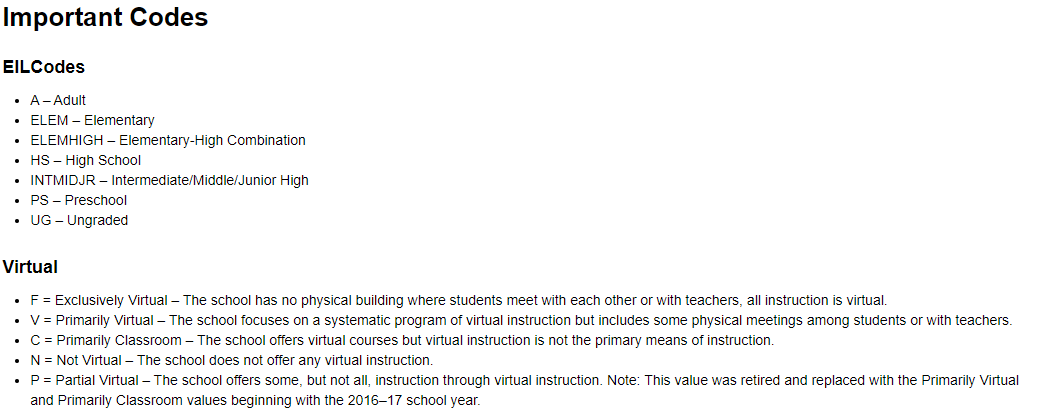

### Incomes

In [20]:
incomes_path = os.path.join('Datasets', 'suave_income.csv')
incomes = pd.read_csv(incomes_path, low_memory=False)

In [21]:
incomes_classes = incomes[["ZIP", 
         "Hholds with income Less than $10,000#number", 
         'Hholds with income $10,000 to $14,999#number',
         'Hholds with income $15,000 to $24,999#number',
         'Hholds with income $25,000 to $34,999#number',
         'Hholds with income $35,000 to $49,999#number',
         'Hholds with income $50,000 to $74,999#number',
         'Hholds with income $75,000 to $99,999#number',
         'Hholds with income $100,000 to $149,999#number',
         'Hholds with income $150,000 to $199,999#number',
         'Hholds with income $200,000 or more#number',
         'Median family income (dollars)#number',
         'Mean family income (dollars)#number',
         'Health insurance coverage, % of civilian pop#number',
         'No health insurance for civil pop#number',
         'No health insurance coverage, %#number',
         'Worked at home#number', 'Population 16+yo#number', 'Children of the hh 6-17 yo#number'
         ]]
incomes_clean = incomes_classes.copy()
incomes_clean["Households with income $0-34,999"] = (incomes_classes["Hholds with income Less than $10,000#number"] 
                                               + incomes_classes["Hholds with income $10,000 to $14,999#number"] 
                                               + incomes_classes["Hholds with income $15,000 to $24,999#number"] 
                                               + incomes_classes["Hholds with income $25,000 to $34,999#number"]
                                              )
incomes_clean["Households with income $35,000-99,999"] = (incomes_classes["Hholds with income $35,000 to $49,999#number"] 
                                               + incomes_classes["Hholds with income $50,000 to $74,999#number"] 
                                               + incomes_classes["Hholds with income $75,000 to $99,999#number"] 
                                              )
incomes_clean["Households with income $100,000+"] = (incomes_classes["Hholds with income $100,000 to $149,999#number"] 
                                               + incomes_classes["Hholds with income $150,000 to $199,999#number"]
                                               + incomes_classes["Hholds with income $200,000 or more#number"] 
                                              ) 
incomes_clean = incomes_clean.drop(["Hholds with income Less than $10,000#number", 
         'Hholds with income $10,000 to $14,999#number',
         'Hholds with income $15,000 to $24,999#number',
         'Hholds with income $25,000 to $34,999#number',
         'Hholds with income $35,000 to $49,999#number',
         'Hholds with income $50,000 to $74,999#number',
         'Hholds with income $75,000 to $99,999#number',
         'Hholds with income $100,000 to $149,999#number',
         'Hholds with income $150,000 to $199,999#number',
         'Hholds with income $200,000 or more#number',], axis=1)
incomes_clean = incomes_clean.rename(columns={'Median family income (dollars)#number': 'Median family income (dollars)',
                                             'Mean family income (dollars)#number' :'Mean family income (dollars)',
                                             'Health insurance coverage, % of civilian pop#number':'Health insurance coverage, % of civilian pop',
                                             'No health insurance for civil pop#number': 'No health insurance for civilian pop',
                                             'No health insurance coverage, %#number': 'No health insurance coverage %',
                                             'Worked at home#number': 'Worked at home',
                                             'ZIP': 'Zipcode', 'Population 16+yo#number':'Population 16+', 
                                             'Children of the hh 6-17 yo#number': 'Children of the household 6-17'})


In [22]:
pop = incomes_clean[["Zipcode", "Population 16+"]]

### Cleaned Demographics Data

In [23]:
cleaned_demo_path = os.path.join('Datasets', 'Cleaned_Demographics_Data.csv')
cleaned_demo = pd.read_csv(cleaned_demo_path, low_memory=False)


### Cleaned Cases by Zipcode

In [24]:
cleaned_cases_path = os.path.join('Datasets', 'Cleaned_Cases_by_Zipcode.csv')
cleaned_cases = pd.read_csv(cleaned_cases_path, low_memory=False)
#cleaned_cases = cleaned_cases.rename(columns={'Zipcode': 'Zip'})

### August Cases Increase

In [25]:
august_cases_path = os.path.join('Datasets', 'August_Case_Increase.csv')
august_cases = pd.read_csv(august_cases_path, low_memory=False)

In [26]:
august_cases = august_cases[["Zipcode", "Absolute Increase", "Percent Increase"]]

In [27]:
august_cases = august_cases.merge(pop, on="Zipcode")

In [28]:
august_cases["Absolute Increase Standardized"] = august_cases["Absolute Increase"] / august_cases["Population 16+"]

In [29]:
august_cases = august_cases.drop(["Absolute Increase", "Population 16+"], axis=1)

In [30]:
## august_cases.head()

# Data Exploration

In [31]:
zips = schools["Zipcode"].unique()

In [32]:
cumulative_clean = cumulative_clean[cumulative_clean["AggregateLevel"] == "S"]

In [33]:
cumulative_clean = cumulative_clean[cumulative_clean["CountyName"] == "San Diego"]
cumulative_clean = cumulative_clean.rename(columns={'SchoolName': "School"})
cumulative_clean = cumulative_clean[cumulative_clean["ReportingCategory"] == "TA"]

In [34]:
cumulative_clean = cumulative_clean[cumulative_clean["Charter"] == "No "]

In [35]:
cumulative_clean = cumulative_clean.drop(["Charter"], axis=1)

In [36]:
merged = schools.merge(cumulative_clean, on="School, District")

In [37]:
done = merged.merge(incomes_clean, on="Zipcode")

In [38]:
done = done.merge(august_cases, on="Zipcode")

In [53]:
done.head(3)

,CDSCode,District,School_x,Zip,WebSite,EILName,Latitude,Longitude,LastUpDate,Address,...,No health insurance for civilian pop,No health insurance coverage %,Worked at home,Population 16+,Children of the household 6-17,"Households with income $0-34,999","Households with income $35,000-99,999","Households with income $100,000+",Percent Increase,Absolute Increase Standardized
0,37103710115998,San Diego County Office of Education,San Pasqual Academy,92025-5301,http://www.sanpasqualacademy.org,High School,33.090580,-116.95009,2019-02-13,"17701 San Pasqual Valley Road,Escondido,CA,92025",...,10756.0,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.9,0.004943
1,37680980102590,Escondido Union,Bear Valley Middle,92025-7618,http://www.eusd.org,Intermediate/Middle/Junior High,33.083711,-117.05634,2020-08-13,"3003 Bear Valley Parkway,Escondido,CA,92025",...,10756.0,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.9,0.004943
2,37680986038178,Escondido Union,Central Elementary,92025-4134,http://www.eusd.org,Elementary,33.118835,-117.07991,2020-08-24,"122 West Fourth Avenue,Escondido,CA,92025",...,10756.0,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.9,0.004943


In [60]:
done_shorter = done.drop(columns=["AggregateLevel", "CountyName", "CDSCode",
                                  "Zip", "WebSite", "ReportingCategory", 
                                  "LastUpDate", "School_x", "School_y", "District"], axis=1)

In [61]:
done_shorter[done_shorter['Address'] == '1954 Komet Way,San Diego,CA,92111']

,EILName,Latitude,Longitude,Address,Zipcode,"School, District",DistrictName,CumulativeEnrollment,Median family income (dollars),Mean family income (dollars),...,No health insurance for civilian pop,No health insurance coverage %,Worked at home,Population 16+,Children of the household 6-17,"Households with income $0-34,999","Households with income $35,000-99,999","Households with income $100,000+",Percent Increase,Absolute Increase Standardized
34,High School,32.798708,-117.16044,"1954 Komet Way,San Diego,CA,92111",92111,"Kearny Digital Media & Design, San Diego Unified",San Diego Unified,405.0,70293.0,88963.0,...,5584.0,11.5,1358.0,40536.0,6596.0,4866.0,7303.0,4788.0,34.55,0.002566
35,High School,32.798708,-117.16044,"1954 Komet Way,San Diego,CA,92111",92111,"Kearny College Connections, San Diego Unified",San Diego Unified,410.0,70293.0,88963.0,...,5584.0,11.5,1358.0,40536.0,6596.0,4866.0,7303.0,4788.0,34.55,0.002566
36,High School,32.798708,-117.16044,"1954 Komet Way,San Diego,CA,92111",92111,"Kearny Eng Innov & Design, San Diego Unified",San Diego Unified,348.0,70293.0,88963.0,...,5584.0,11.5,1358.0,40536.0,6596.0,4866.0,7303.0,4788.0,34.55,0.002566


In [62]:
#Impute value for median family income for zip 91905 with that of 91906
done_shorter.loc[319, "Median family income (dollars)"] = 60240.0

In [63]:
from sklearn.cluster import KMeans
import sklearn.preprocessing as pp

In [64]:
for i in done_shorter.columns:
    if done_shorter[i].isnull().values.any() == True:
        print(i)

In [65]:
done_shorter[done_shorter["Median family income (dollars)"].isna() == True]

,EILName,Latitude,Longitude,Address,Zipcode,"School, District",DistrictName,CumulativeEnrollment,Median family income (dollars),Mean family income (dollars),...,No health insurance for civilian pop,No health insurance coverage %,Worked at home,Population 16+,Children of the household 6-17,"Households with income $0-34,999","Households with income $35,000-99,999","Households with income $100,000+",Percent Increase,Absolute Increase Standardized


In [66]:
# Numeric columns and associated transformers
num_feat = [
    'CumulativeEnrollment', 
    'Median family income (dollars)', 
    'Mean family income (dollars)', 
    "Health insurance coverage, % of civilian pop", 
    "No health insurance for civilian pop", 
    "No health insurance coverage %", 
    "Worked at home", 
    "Households with income $0-34,999", 
    "Households with income $35,000-99,999", 
    "Households with income $100,000+",
    "Population 16+",
    "Children of the household 6-17",
    "Absolute Increase Standardized",
    "Percent Increase"
]
num_transformer = Pipeline(steps=[
    ('scaler', pp.StandardScaler())   # z-scale
])

# Categorical columns and associated transformers
cat_feat = ['EILName', 'Zipcode']
cat_transformer = Pipeline(steps=[
    ('intenc', pp.OrdinalEncoder()),   # converts to int
    ('onehot', pp.OneHotEncoder())     # output from Ordinal becomes input to OneHot
])

# preprocessing pipeline (put them together)
preproc = ColumnTransformer(transformers=[('num', num_transformer, num_feat), ('cat', cat_transformer, cat_feat)])

pl = Pipeline(steps=[('preprocessor', preproc), ('kmeans', KMeans(n_clusters=2, n_init=100))])

In [67]:
pl.fit(done_shorter)

C:\Users\Andrew Chin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['CumulativeEnrollment', 'Median ..._init=100, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [68]:
predictions = pl.predict(done_shorter)

In [69]:
done_shorter["predictions"] = predictions

In [70]:
done_shorter[["School, District", "predictions"]]

,"School, District",predictions
0,"San Pasqual Academy, San Diego County Office o...",0
1,"Bear Valley Middle, Escondido Union",0
2,"Central Elementary, Escondido Union",0
3,"Del Dios Academy of Arts and Sciences, Escondi...",0
4,"Felicita Elementary, Escondido Union",0
5,"Juniper Elementary, Escondido Union",0
6,"Miller Elementary, Escondido Union",0
7,"L. R. Green Elementary, Escondido Union",0
8,"San Pasqual High, Escondido Union High",0
9,"Davila Day, San Diego County Office of Education",0


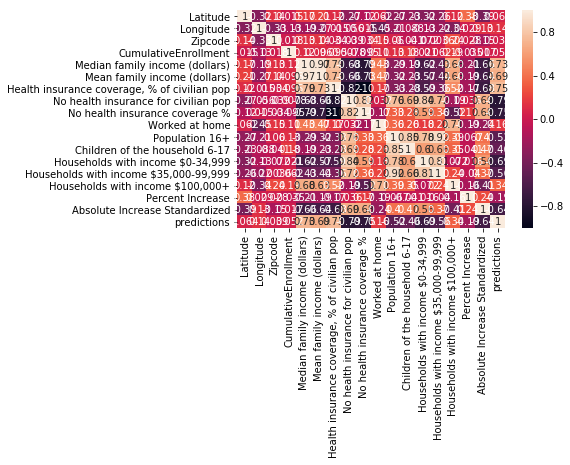

In [71]:
import seaborn as sns 
  
# generating correlation heatmap 
sns.heatmap(done_shorter.corr(), annot = True) 

In [106]:
done_shorter

,EILName,Latitude,Longitude,Address,Zipcode,"School, District",DistrictName,CumulativeEnrollment,Median family income (dollars),Mean family income (dollars),...,No health insurance coverage %,Worked at home,Population 16+,Children of the household 6-17,"Households with income $0-34,999","Households with income $35,000-99,999","Households with income $100,000+",Percent Increase,Absolute Increase Standardized,predictions
0,High School,33.090580,-116.95009,"17701 San Pasqual Valley Road,Escondido,CA,92025",92025,"San Pasqual Academy, San Diego County Office o...",San Diego County Office of Education,94.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
1,Intermediate/Middle/Junior High,33.083711,-117.05634,"3003 Bear Valley Parkway,Escondido,CA,92025",92025,"Bear Valley Middle, Escondido Union",Escondido Union,1064.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
2,Elementary,33.118835,-117.07991,"122 West Fourth Avenue,Escondido,CA,92025",92025,"Central Elementary, Escondido Union",Escondido Union,649.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
3,Intermediate/Middle/Junior High,33.110370,-117.10117,"1400 West Ninth Avenue,Escondido,CA,92025",92025,"Del Dios Academy of Arts and Sciences, Escondi...",Escondido Union,833.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
4,Elementary,33.106493,-117.08245,"737 West 13th Avenue,Escondido,CA,92025",92025,"Felicita Elementary, Escondido Union",Escondido Union,574.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
5,Elementary,33.105286,-117.06731,"1809 South Juniper Street,Escondido,CA,92025",92025,"Juniper Elementary, Escondido Union",Escondido Union,682.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
6,Elementary,33.096460,-117.07896,"1975 Miller Avenue,Escondido,CA,92025",92025,"Miller Elementary, Escondido Union",Escondido Union,460.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
7,Elementary,33.086003,-117.05973,"3115 Las Palmas Avenue,Escondido,CA,92025",92025,"L. R. Green Elementary, Escondido Union",Escondido Union,857.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
8,High School,33.077688,-117.05724,"3300 Bear Valley Parkway,Escondido,CA,92025",92025,"San Pasqual High, Escondido Union High",Escondido Union High,2294.0,59509.0,85640.0,...,20.4,1310.0,40463.0,8965.0,4812.0,6688.0,3681.0,48.90,0.004943,0
9,Elementary,32.635041,-117.08832,"540 G Street,Chula Vista,CA,91910",91910,"Davila Day, San Diego County Office of Education",San Diego County Office of Education,34.0,69198.0,84506.0,...,10.7,1303.0,61455.0,10820.0,7681.0,11170.0,6524.0,31.97,0.006362,0


In [94]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# Create dataset with 3 random cluster centers and 1000 datapoints
x, y = make_blobs(n_samples = 1000, centers = 3, n_features=2, shuffle=True, random_state=31)

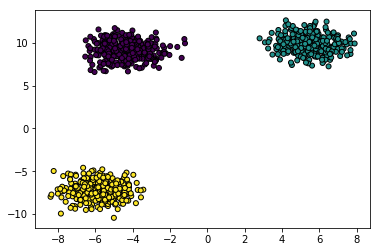

In [98]:
# matplotlib.pyplot.scatter(x,y)
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [99]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    return sse

In [105]:
calculate_WSS(x,6)

[89655.1340498759]